## old

In [ ]:
import mne

# Load some example MNE epochs data
epochs = mne.datasets.sample.load_data().pick_types(
    eeg=True, meg=False).filter(1, 30)

# Compute the PSD for each epoch
psds, freqs = mne.time_frequency.psd_multitaper(
    epochs, fmin=1, fmax=30, n_jobs=1)

# Plot the PSD with confidence intervals for the first epoch
epoch_idx = 0
psd_mean = psds[epoch_idx].mean(axis=0)
psd_std = psds[epoch_idx].std(axis=0)
psd_upper = psd_mean + psd_std
psd_lower = psd_mean - psd_std

fig, ax = plt.subplots()
ax.plot(freqs, psd_mean)
ax.fill_between(freqs, psd_upper, psd_lower, alpha=0.2)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Power Spectral Density (normalized)')
ax.set_title(f'Epoch {epoch_idx+1} PSD with 95% Confidence Interval')
plt.show()


In [1]:
import os
import sys
import mne
import matplotlib
import random
sys.path.insert(1,'..')
from loader import Loaddata

ModuleNotFoundError: No module named 'codes'

 Load raw

In [2]:

self = Loaddata()
import numpy as np

def twolabel_raw(self, folder_path,ai_path, prf=None, norm = False):
       
        data, t = self.readEEG(folder_path+"/"+prf+".csv")
        label1 = self.readStageSeq(folder_path+"/"+prf+"_Trend.csv")
        label2 = self.readStageSeq(ai_path+"/"+prf+".txt")
        
        label = np.char.add(label1, label2)      
        onset = np.arange(0, 4*len(label),4)      
        fourS = np.array(len(label)*[4])
        my_annot = mne.Annotations(onset, duration=fourS, description=label)
        inf = mne.create_info(["eeg"], 128,'eeg')      
        data = np.array(data).reshape(1, -1)
        #norm
        if norm:
                data -= np.mean(data, axis=1, keepdims=True)
                data = data / np.std(data, axis=1, keepdims=True)
        raw = mne.io.RawArray(data, inf)      
        raw.set_annotations(my_annot)
        return raw

# o_pt = "./data/three/20200601S181BL-1/"
# sap_path = "./data/sets/set0/"

pf = "20200601S181BL-1"
# raw = twolabel_raw(self, "../data/allraw/20200601S181BL-1","../data/aiset", pf)
raw = twolabel_raw(self, "../data/allraw/20200601S181BL-1","../data/aiset", pf, norm = 1) 

# raw_n = twolabel_raw(self, "../data/allraw/20200601S181BL-1","../data/aiset", pf, norm = 1) 



---------------------
Started to read ../data/allraw/20200601S181BL-1/20200601S181BL-1.csv. It may take a few minutes before starting to classify. Please wait.
---------------------
Creating RawArray with float64 data, n_channels=1, n_times=2780160
    Range : 0 ... 2780159 =      0.000 ... 21719.992 secs
Ready.


## stft vis

In [ ]:
import mne
eps = mne.read_epochs("../fif/all2L_epo.fif")
# h = eps['H'].get_data().reshape(-1,512)
# l = eps['L'].get_data().reshape(-1, 512)
# r = eps['R'].get_data().reshape(-1,512)
# n = eps['S'].get_data().reshape(-1,512)
hh = eps['HH'].get_data().reshape(-1, 512)
ll = eps['LL'].get_data().reshape(-1, 512)
hl = eps['HL'].get_data().reshape(-1, 512)


In [14]:
data = hh[1]

C:\Users\ImpWa\AppData\Local\Temp\ipykernel_14468\782419848.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


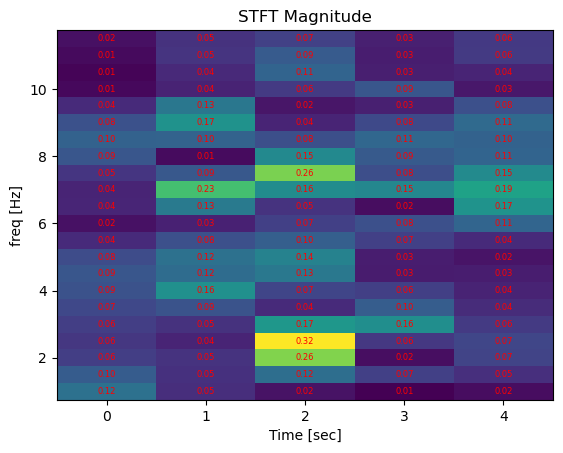

In [15]:
import matplotlib.pyplot as plt

from scipy import signal
import numpy as np


def stft_bin(eegepoch):
    samplingFreq = 128
    stft_nperseg = 256
    high_pass = 1
    low_pass = 12

    freqs, segment_times, Zxx = signal.stft(
        eegepoch, fs=samplingFreq, nperseg=stft_nperseg)

    def filtering(Zxx, freqs, lowerFreq, upperFreq):
        zipped = list(filter(lambda x: lowerFreq <=
                             x[1] and x[1] < upperFreq, zip(Zxx, freqs)))
        return np.array([e[0] for e in zipped]), np.array([e[1] for e in zipped])

    Zxx_filtered, f = filtering(Zxx, freqs, high_pass, low_pass)
    Zxx_binned = np.abs(Zxx_filtered)

    return Zxx_binned

segment_times = range(5)
f = np.arange(1.0, 12.0, 0.5)
stft = stft_bin(data)

fig,axs = plt.subplots()
axs.pcolormesh(segment_times, f, stft)#shading='gouraud')
axs.set_title('STFT Magnitude')
axs.set_ylabel('freq [Hz]')
axs.set_xlabel('Time [sec]')

x, y = segment_times, f
for i in range(len(y)):
    for j in range(len(x)):
        axs.annotate(f'{stft[i, j]:.2f}', xy=(
            x[j], y[i]), ha='center', va='center', fontsize=6, color="r")
fig.show()

updated 5*5

In [5]:
# from scipy import signal
# import numpy as np
# def stft_bin(eegepoch):
#     samplingFreq = 128
#     stft_nperseg = 256
#     high_pass = 1
#     low_pass = 12 

#     freqs, segment_times, Zxx = signal.stft(eegepoch, fs=samplingFreq, nperseg=stft_nperseg)
#     def filtering(Zxx, freqs, lowerFreq, upperFreq):
#         zipped = list(filter(lambda x: lowerFreq <=
#                              x[1] and x[1] < upperFreq, zip(Zxx, freqs)))
#         return np.array([e[0] for e in zipped]), np.array([e[1] for e in zipped])

#     Zxx_filtered, f = filtering(Zxx, freqs, high_pass, low_pass)
#     Zxx_binned = np.abs(Zxx_filtered)


    
#     return segment_times,f,Zxx_binned
# t = stft_bin(h[0])
# segment_times,f = t[0],t[1]

In [1]:
from scipy import signal
import numpy as np
def stft_bin(eegepoch):
    samplingFreq = 128
    stft_nperseg = 256
    high_pass = 1
    low_pass = 12 

    freqs, segment_times, Zxx = signal.stft(eegepoch, fs=samplingFreq, nperseg=stft_nperseg)
    def filtering(Zxx, freqs, lowerFreq, upperFreq):
        zipped = list(filter(lambda x: lowerFreq <=
                             x[1] and x[1] < upperFreq, zip(Zxx, freqs)))
        return np.array([e[0] for e in zipped]), np.array([e[1] for e in zipped])

    Zxx_filtered, f = filtering(Zxx, freqs, high_pass, low_pass)
    Zxx_binned = np.abs(Zxx_filtered)


    
    return Zxx_binned

In [4]:
# from scipy import signal
# import numpy as np
# def stft_bin(eegepoch):
#     samplingFreq = 128
#     stft_nperseg = 256
#     high_pass = 1
#     low_pass = 12 

#     freqs, segment_times, Zxx = signal.stft(eegepoch, fs=samplingFreq, nperseg=stft_nperseg)
#     def filtering(Zxx, freqs, lowerFreq, upperFreq):
#         zipped = list(filter(lambda x: lowerFreq <=
#                              x[1] and x[1] < upperFreq, zip(Zxx, freqs)))
#         return np.array([e[0] for e in zipped]), np.array([e[1] for e in zipped])

#     Zxx_filtered, f = filtering(Zxx, freqs, high_pass, low_pass)
    
#     # freqNum = round((low_pass-high_pass) / freq_tick)
#     freqNum = Zxx_filtered.shape[0]
#     binSize = (len(Zxx) // freqNum)
#     bins = range(-(-freqNum//binSize))

#     Zxx_binned = np.array([np.sum(np.abs(Zxx_filtered[(binID*binSize):((binID+1)*binSize)]), axis=0) for binID in bins])#ceil
    
#     # return np.array([np.sum(np.abs(Zxx_filtered[(binID*binSize):((binID+1)*binSize)]), axis=0) for binID in bins])#ceil

    
#     return Zxx_binned

H and L

In [8]:
import matplotlib.pyplot as plt
import numpy as np

l_freqMatrix = [stft_bin(l[i]) for i in range(len(l))]
h_freqMatrix = [stft_bin(h[i]) for i in range(len(h))]


p1 = np.mean(l_freqMatrix, axis=0)
p2 = np.std(l_freqMatrix, axis=0)
p3 = np.mean(h_freqMatrix, axis=0)
p4 = np.std(h_freqMatrix, axis=0)

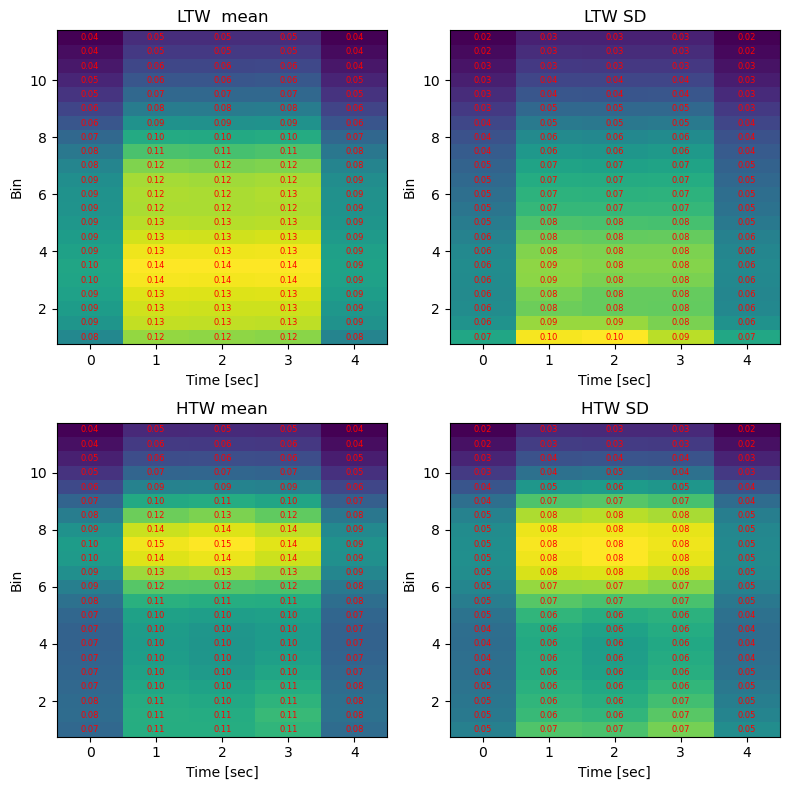

In [10]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

# Plot the first subplot in the upper left corner
pcm = axs[0, 0].pcolormesh(segment_times, f, p1)
axs[0, 0].set_title('LTW  mean')
axs[0, 0].set_ylabel('Frequency(Hz)')
axs[0, 0].set_xlabel('Time [sec]')

# Plot the second subplot in the upper right corner

pcm = axs[1, 0].pcolormesh(segment_times, f, p2)
axs[1, 0].set_title('LTW SD')
axs[1, 0].set_ylabel('Frequency(Hz)')
axs[1, 0].set_xlabel('Time [sec]')

# Plot the third subplot in the lower left corner

pcm = axs[0, 1].pcolormesh(segment_times, f, p3)
axs[0, 1].set_title('HTW mean')
axs[0, 1].set_ylabel('Frequency(Hz)')
axs[0, 1].set_xlabel('Time [sec]')

# Plot the fourth subplot in the lower right corner

pcm = axs[1, 1].pcolormesh(segment_times, f, p4)
axs[1, 1].set_title('HTW SD')
axs[1, 1].set_ylabel('Frequency(Hz)')
axs[1, 1].set_xlabel('Time [sec]')

# #
# fig.colorbar(pcm, ax=axs[0, 0])
# fig.colorbar(pcm, ax=axs[0, 1])
# fig.colorbar(pcm, ax=axs[1, 0])
# fig.colorbar(pcm, ax=axs[1, 1])

x, y = segment_times, f
for i in range(len(y)):
    for j in range(len(x)):
        axs[0, 0].annotate(f'{p1[i, j]:.2f}', xy=(x[j], y[i]), ha='center', va='center', fontsize=6, color ="r")
        axs[0, 1].annotate(f'{p2[i, j]:.2f}', xy=(x[j], y[i]), ha='center', va='center', fontsize=6, color ="r")
        axs[1, 0].annotate(f'{p3[i, j]:.2f}', xy=(x[j], y[i]), ha='center', va='center', fontsize=6, color ="r")
        axs[1, 1].annotate(f'{p4[i, j]:.2f}', xy=(x[j], y[i]), ha='center', va='center', fontsize=6, color ="r")

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()


HH HL LL

In [1]:
import mne
raws = mne.io.Raw('twoL_all_raw.fif')

events, id = mne.events_from_annotations(raws)
tmax = 4. - 1. / raws.info['sfreq']  # tmax in included
# picks = mne.pick_types(raw.info, eeg=True, emg=True)
epochs = mne.Epochs(raw=raws, events=events, event_id=id,
                    preload=True, tmin=0., tmax=tmax, baseline=None)

# eps = mne.read_epochs("./data/all2L_epo.fif")


Opening raw data file twoL_all_raw.fif...


FileNotFoundError: fname does not exist: d:\OneDrive - 筑波大学\lab\codes\2labpc\handler\twoL_all_raw.fif

In [3]:
import mne
epochs = mne.read_epochs("fif/all2L_epo.fif")
hh = epochs['HH'].get_data().reshape(-1, 512)
hl = epochs['HL'].get_data().reshape(-1, 512)
ll = epochs['LL'].get_data().reshape(-1, 512)


Reading d:\OneDrive - 筑波大学\lab\codes\2labpc\handler\fif\all2L_epo.fif ...
Isotrak not found
    Found the data of interest:
        t =       0.00 ...    3992.19 ms
        0 CTF compensation matrices available
Not setting metadata
832010 matching events found
No baseline correction applied
0 projection items activated


In [5]:
import matplotlib.pyplot as plt
import numpy as np

ll_freqMatrix = [stft_bin(ll[i]) for i in range(len(ll))]
hl_freqMatrix = [stft_bin(hl[i]) for i in range(len(hl))]
hh_freqMatrix = [stft_bin(hh[i]) for i in range(len(hh))]

segment_times = range(5)
f = np.arange(1.0, 12.0, 0.5)

In [6]:
# p1 = np.mean([stft_bin(ll[i]) for i in range(len(ll))], axis=0)
# p2 = np.std([stft_bin(ll[i]) for i in range(len(ll))], axis=0)
# p3 = np.mean([stft_bin(hh[i]) for i in range(len(hh))], axis=0)
# p4 = np.std([stft_bin(hh[i]) for i in range(len(hh))], axis=0)
# p5 = np.mean([stft_bin(hl[i]) for i in range(len(hl))], axis=0)
# p6 = np.std([stft_bin(hl[i]) for i in range(len(hl))], axis=0)


p1 = np.mean(ll_freqMatrix, axis=0)
p2 = np.std(ll_freqMatrix, axis=0)
p3 = np.mean(hh_freqMatrix, axis=0)
p4 = np.std(hh_freqMatrix, axis=0)
p5 = np.mean(hl_freqMatrix, axis=0)
p6 = np.std(hl_freqMatrix, axis=0)


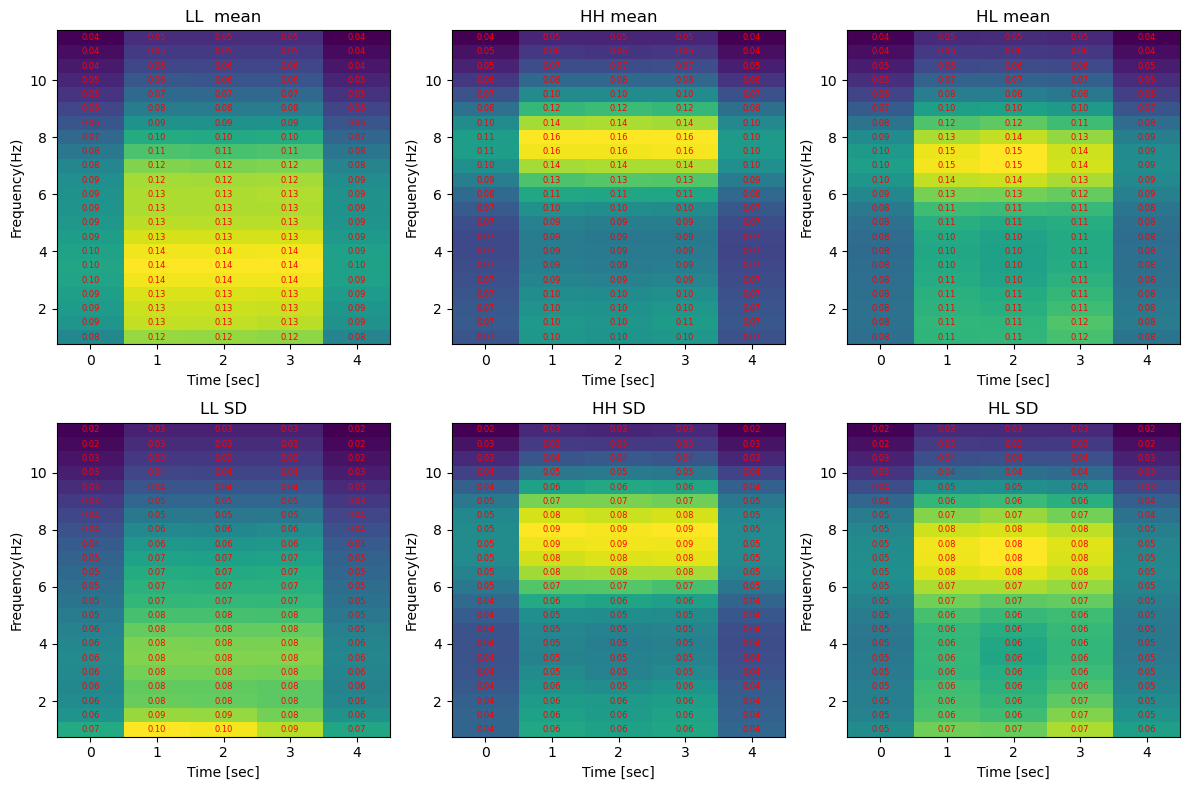

In [7]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# Plot the first subplot in the upper left corner
axs[0, 0].pcolormesh(segment_times, f, p1)
axs[0, 0].set_title('LL  mean')
axs[0, 0].set_ylabel('Frequency(Hz)')
axs[0, 0].set_xlabel('Time [sec]')

# Plot the second subplot in the upper right corner
axs[1, 0].pcolormesh(segment_times, f, p2)
axs[1, 0].set_title('LL SD')
axs[1, 0].set_ylabel('Frequency(Hz)')
axs[1, 0].set_xlabel('Time [sec]')

# Plot the third subplot in the lower left corner
axs[0, 1].pcolormesh(segment_times, f, p3)
axs[0, 1].set_title('HH mean')
axs[0, 1].set_ylabel('Frequency(Hz)')
axs[0, 1].set_xlabel('Time [sec]')

# Plot the fourth subplot in the lower right corner
axs[1, 1].pcolormesh(segment_times, f, p4)
axs[1, 1].set_title('HH SD')
axs[1, 1].set_ylabel('Frequency(Hz)')
axs[1, 1].set_xlabel('Time [sec]')

axs[0, 2].pcolormesh(segment_times, f, p5)
axs[0, 2].set_title('HL mean')
axs[0, 2].set_ylabel('Frequency(Hz)')
axs[0, 2].set_xlabel('Time [sec]')

axs[1, 2].pcolormesh(segment_times, f, p6)
axs[1, 2].set_title('HL SD')
axs[1, 2].set_ylabel('Frequency(Hz)')
axs[1, 2].set_xlabel('Time [sec]')

# 
x, y = segment_times, f
for i in range(len(y)):
    for j in range(len(x)):
        axs[0, 0].annotate(f'{p1[i, j]:.2f}', xy=(
            x[j], y[i]), ha='center', va='center', fontsize=6, color="r")
        axs[0, 1].annotate(f'{p3[i, j]:.2f}', xy=(
            x[j], y[i]), ha='center', va='center', fontsize=6, color="r")
        axs[1, 0].annotate(f'{p2[i, j]:.2f}', xy=(
            x[j], y[i]), ha='center', va='center', fontsize=6, color="r")
        axs[1, 1].annotate(f'{p4[i, j]:.2f}', xy=(
            x[j], y[i]), ha='center', va='center', fontsize=6, color="r")
        axs[0, 2].annotate(f'{p5[i, j]:.2f}', xy=(
            x[j], y[i]), ha='center', va='center', fontsize=6, color="r")
        axs[1, 2].annotate(f'{p6[i, j]:.2f}', xy=(
            x[j], y[i]), ha='center', va='center', fontsize=6, color="r")

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()


In [8]:
epochs.save("all2L_epo.fif")

C:\Users\SSG Lab\AppData\Local\Temp\ipykernel_10376\3964864954.py:1: RuntimeWarning: epochs.drop_log contains 832011 entries which will incur up to a 9.5 MB writing overhead (per split file), consider using epochs.reset_drop_log_selection() prior to writing
  epochs.save("all2L_epo.fif")


## Paint Raw figure


In [3]:
%matplotlib

raw.load_data().filter(0, 15)
events, id = mne.events_from_annotations(raw)
tmax = 4. - 1. / raw.info['sfreq']  # tmax in included
# picks = mne.pick_types(raw.info, eeg=True, emg=True)
epochs = mne.Epochs(raw=raw, events=events, event_id=id,
                    preload=True, tmin=0., tmax=tmax, baseline=None)
# epochs['HH'][:5].plot(theme="light", scalings=5, title="hh")
# epochs['HL'][:5].plot(theme="light", scalings=5)
# epochs['LL'][:5].plot(theme="light", scalings=5)



Using matplotlib backend: <object object at 0x000001DE94579CD0>
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 15 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 15.00 Hz
- Upper transition bandwidth: 3.75 Hz (-6 dB cutoff frequency: 16.88 Hz)
- Filter length: 113 samples (0.883 sec)

Used Annotations descriptions: ['HH', 'HL', 'HR', 'HS', 'L?', 'LH', 'LL', 'LR', 'LS', 'RL', 'RR', 'RS', 'SL', 'SR', 'SS']
Not setting metadata


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


5430 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 5430 events and 512 original time points ...
0 bad epochs dropped


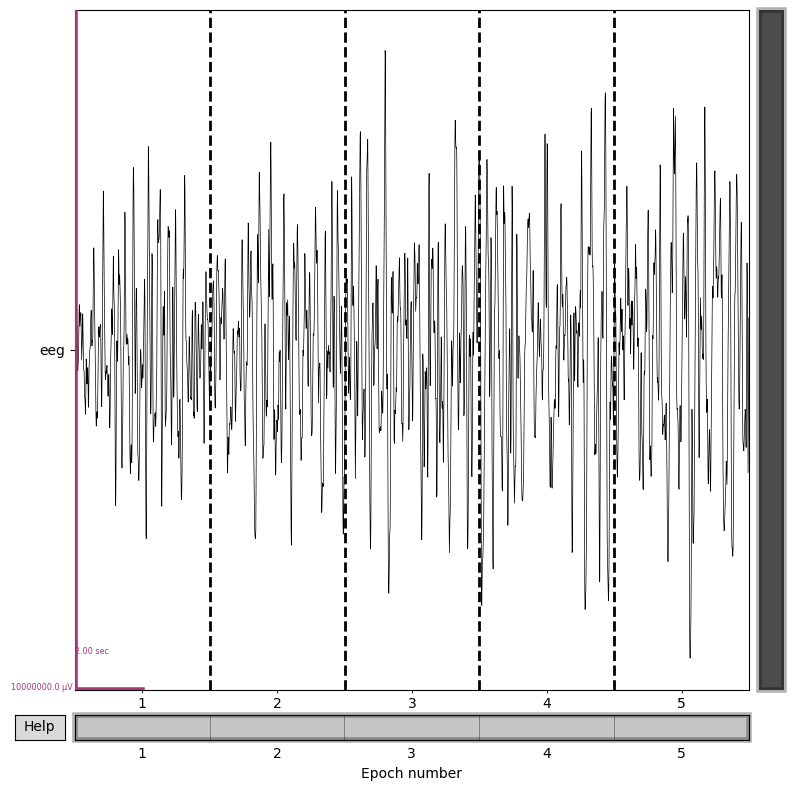

In [11]:
eps["S"][:5].plot(scalings = 5)
plt.show()


In [140]:
import matplotlib.pyplot as plt
import numpy as np
from mne import create_info, EpochsArray
from mne.viz import plot_raw

# Generate some sample EEG data
sampling_rate = 128  # Hz
duration = 4  # seconds
n_epochs = 3
num_samples = n_epochs * sampling_rate * duration
time = np.arange(num_samples) / sampling_rate
eeg_data = np.sin(2 * np.pi * 10 * time) + 0.5 * np.sin(2 *
                                                        np.pi * 50 * time) + np.random.randn(num_samples)

# Create MNE Info object and Epochs object
ch_names = ['EEG %d' % i for i in range(1, 5)]
ch_types = ['eeg'] * 4
info = create_info(ch_names, sfreq=sampling_rate, ch_types=ch_types)
data = np.reshape(eeg_data, (n_epochs, sampling_rate * duration, 4))
epochs = EpochsArray(data, info)

# Plot the EEG data using MNE's plot_raw function
fig = plot_raw(epochs, start=0, duration=duration*n_epochs,
               scalings='auto', color=dict(eeg=(0, 0, 0)))
ax = fig.get_axes()[0]

# Add dotted line at every 4 seconds
for i in range(0, round(duration * n_epochs), 4):
    ax.axvline(x=i, color='gray', linestyle='--')

plt.show()


ValueError: cannot reshape array of size 1536 into shape (3,512,4)

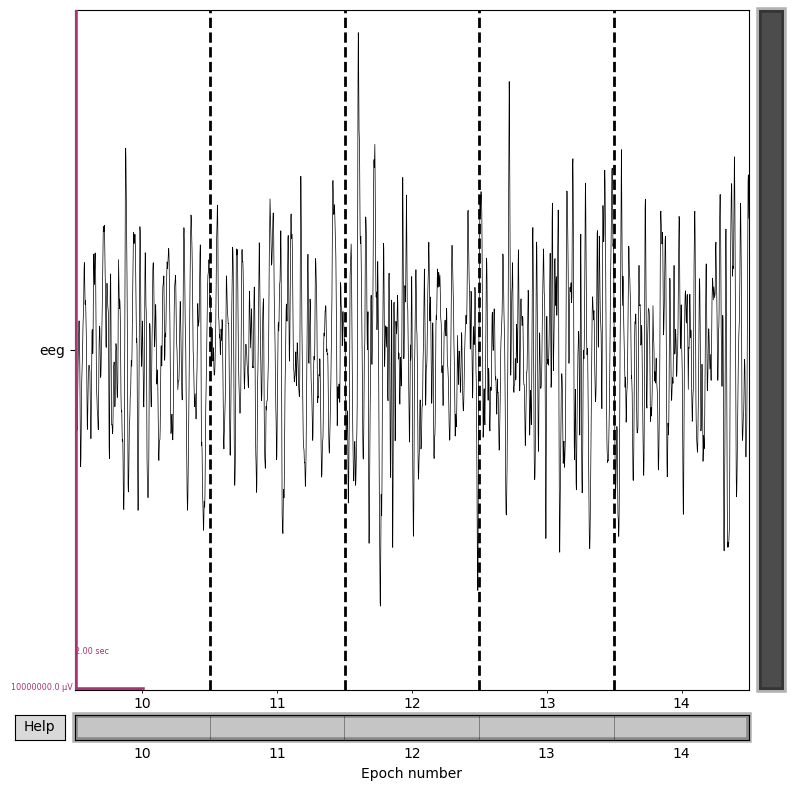

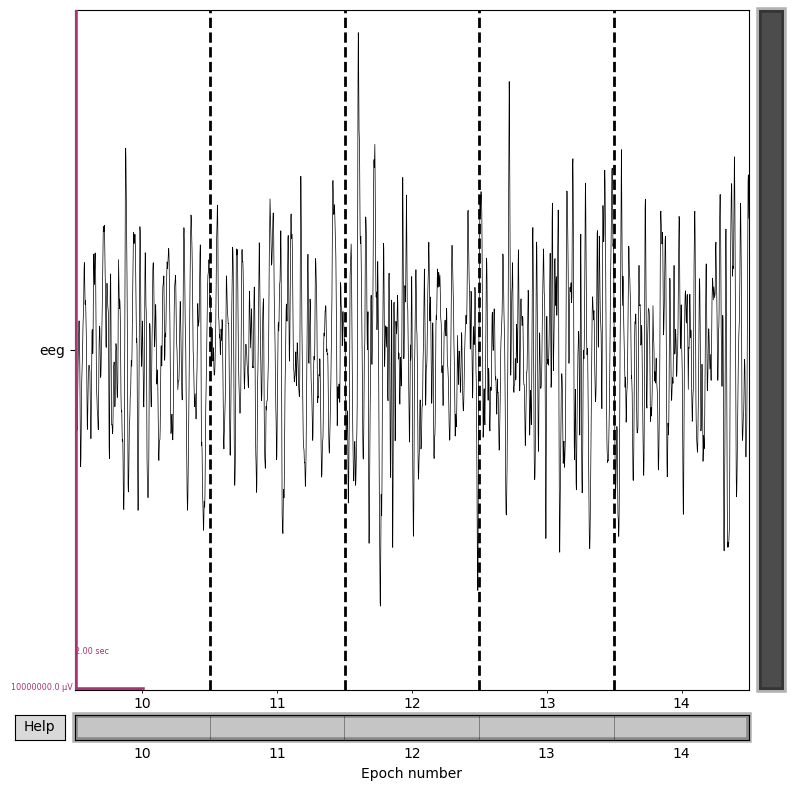

In [153]:
plot_epochs(eps['SS'][:5],scalings=5)


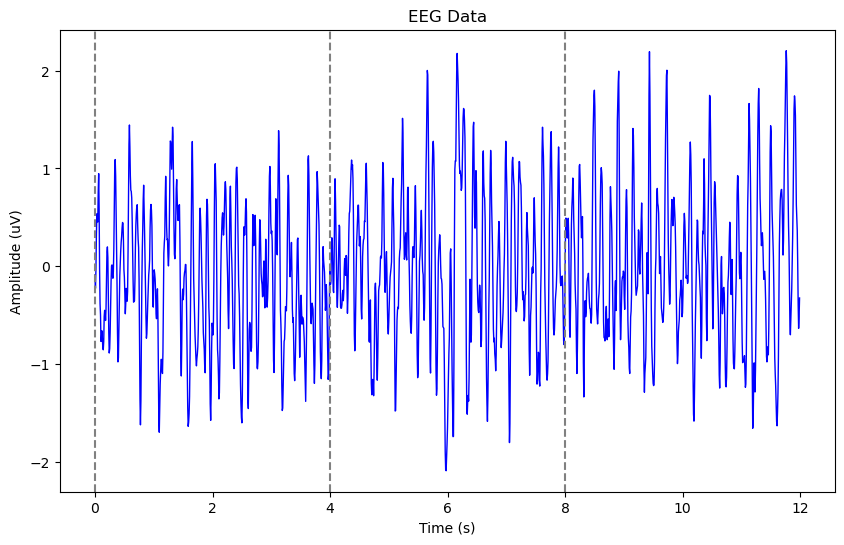

In [139]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some sample EEG data
sampling_rate = 128  # Hz
duration = 4  # seconds
n_epochs = 3
num_samples = n_epochs*sampling_rate * duration
time = np.arange(num_samples) / sampling_rate
# eeg_data = np.sin(2 * np.pi * 10 * time) + 0.5 * np.sin(2 *np.pi * 50 * time) + np.random.randn(num_samples)
data = eps["HH"].get_data()[:3].reshape(-1)
# Plot the EEG data
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(time, data, linewidth=1,color='b')
# Add dotted line at every 4 seconds
for i in range(0,round(time[-1]), 4):
    ax.axvline(x=i, color='gray', linestyle='--')

ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude (uV)')
ax.set_title('EEG Data')
plt.show()


In [14]:
np.arange(512) / 128


array([0.       , 0.0078125, 0.015625 , 0.0234375, 0.03125  , 0.0390625,
       0.046875 , 0.0546875, 0.0625   , 0.0703125, 0.078125 , 0.0859375,
       0.09375  , 0.1015625, 0.109375 , 0.1171875, 0.125    , 0.1328125,
       0.140625 , 0.1484375, 0.15625  , 0.1640625, 0.171875 , 0.1796875,
       0.1875   , 0.1953125, 0.203125 , 0.2109375, 0.21875  , 0.2265625,
       0.234375 , 0.2421875, 0.25     , 0.2578125, 0.265625 , 0.2734375,
       0.28125  , 0.2890625, 0.296875 , 0.3046875, 0.3125   , 0.3203125,
       0.328125 , 0.3359375, 0.34375  , 0.3515625, 0.359375 , 0.3671875,
       0.375    , 0.3828125, 0.390625 , 0.3984375, 0.40625  , 0.4140625,
       0.421875 , 0.4296875, 0.4375   , 0.4453125, 0.453125 , 0.4609375,
       0.46875  , 0.4765625, 0.484375 , 0.4921875, 0.5      , 0.5078125,
       0.515625 , 0.5234375, 0.53125  , 0.5390625, 0.546875 , 0.5546875,
       0.5625   , 0.5703125, 0.578125 , 0.5859375, 0.59375  , 0.6015625,
       0.609375 , 0.6171875, 0.625    , 0.6328125, 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# Generate some sample EEG data
sampling_rate = 128  # Hz
duration = 4  # seconds
n_epochs = 3
num_samples = n_epochs*sampling_rate * duration
time = np.arange(num_samples) / sampling_rate
# eeg_data = np.sin(2 * np.pi * 10 * time) + 0.5 * np.sin(2 *np.pi * 50 * time) + np.random.randn(num_samples)
data = eps["HH"].get_data()[:3].reshape(-1)
# Plot the EEG data
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(time, data, linewidth=1,color='b')
# Add dotted line at every 4 seconds
for i in range(0,round(time[-1]), 4):
    ax.axvline(x=i, color='gray', linestyle='--')

ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude (uV)')
ax.set_title('EEG Data')
plt.show()


In [ ]:
eps['HH'][:3].plot(show=False)
# fig = raw1.plot(start=0, duration=10, color='blue', show=False)
eps['HL'][:3].plot(show=False)

# Add a legend
# f1.subplots[0].legend(['Raw 1', 'Raw 2'])

# Show the plot
mne.viz.tight_layout()
plt.show()


In [ ]:
l_h = random.randint(0, len(epochs['HH'])-4)
l_m = random.randint(0, len(epochs['HL'])-4)
l_l = random.randint(0, len(epochs['LL'])-4)

epochs['HH'][l_h:l_h+3].plot(butterfly=True, scalings=10, title="HH")
epochs['HL'][l_h:l_h+3].plot(butterfly=True, scalings=10, title="HL")
epochs['LL'][l_h:l_h+3].plot(butterfly=True, scalings=10, title="LL")


## Paint PSD

### psd by label

In [ ]:
psd_all(epochs)

In [3]:
import matplotlib.pyplot as plt 

def psd_all(epochs, log=False, twolabels=True, ci=True):
  fig, ax = plt.subplots(figsize=(16, 9))
  
  def add_stg(cav, epochs,label):
    psd, freqs = epochs.compute_psd(fmin=1, fmax=14).get_data(
            return_freqs=True)  # , fmin=fmin, fmax=fmax, n_jobs=1)
    total_power = np.sum(psd, axis=-1, keepdims=True)
    # normalized_psd = (psd / total_power)  # 100*(psd1 / total_power)
    normalized_psd = 10 * np.log10 (psd / total_power)
    m1 = np.mean(normalized_psd, axis=0)[0]
    sd1 = np.std(normalized_psd, axis=0)[0]
    cav.plot(freqs, m1,label = label)  # , label="HTW: "+str(len(epochs['R'])))
    cav.fill_between(freqs, m1-sd1, m1+sd1, alpha=.2)
  if twolabels:
    add_stg(ax, epochs["HH"],"H>H" )
    add_stg(ax, epochs["HL"],"H>L" )
    add_stg(ax, epochs["LL"],"L>L" )
  else:
    add_stg(ax, epochs["H"],"H" )
    add_stg(ax, epochs["L"],"L" )

  # Add .. to the plot
  ax.legend()
  ax.set_xticks(np.arange(0, 20, 1))
  ax.set_xlabel('Frequency (Hz)')
  ax.set_ylabel('Power Spectral Density (dB)')
  ax.set_title('Power Spectral Density')

  # Show the plot
  plt.grid()
  plt.show()


In [ ]:
import mne
import matplotlib.pyplot as plt 

epochs = mne.read_epochs("../fif/all2L_epo.fif")
# fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))

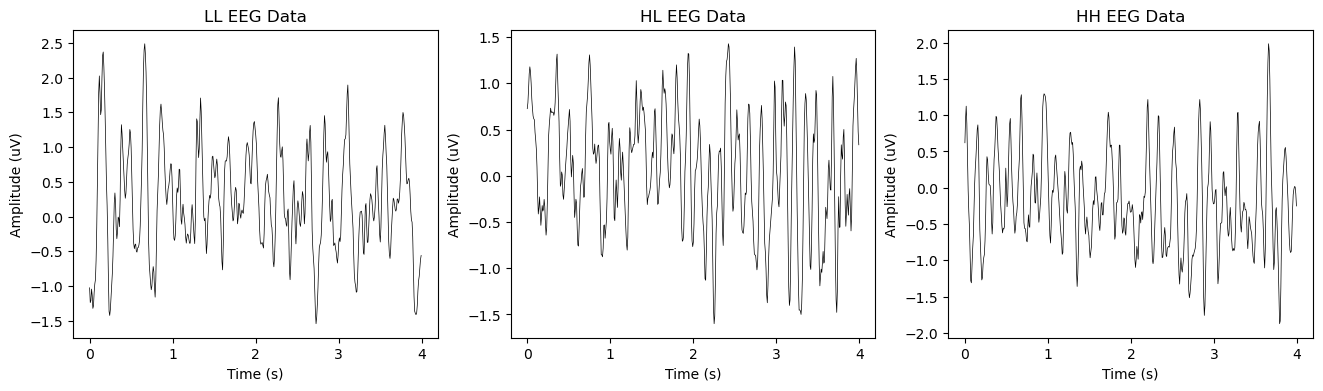

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some sample EEG data
sampling_rate = 128  # Hz
duration = 4  # seconds

num_samples = 512
time = np.arange(num_samples) / sampling_rate
# eeg_data = np.sin(2 * np.pi * 10 * time) + 0.5 * np.sin(2 *np.pi * 50 * time) + np.random.randn(num_samples)
data = epochs["LL"].get_data()[0].reshape(-1)
# Plot the EEG data
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
# fig, ax = plt.subplots(figsize=(10, 6))
axs[0].plot(time, data, linewidth=0.5,color='black')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Amplitude (uV)')
axs[0].set_title('LL EEG Data')

data = epochs["HL"].get_data()[0].reshape(-1)
axs[1].plot(time, data, linewidth=0.5,color='black')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Amplitude (uV)')
axs[1].set_title('HL EEG Data')

data = epochs["HH"].get_data()[0].reshape(-1)
axs[2].plot(time, data, linewidth=0.5,color='black')
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Amplitude (uV)')
axs[2].set_title('HH EEG Data')
# Add dotted line at every 4 seconds
# for i in range(0,round(time[-1]), 4):
#     ax.axvline(x=i, color='gray', linestyle='--')


plt.show()


In [ ]:
# fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))

epochs['LL'][0].plot(scalings=5)
epochs['HL'][1].plot(scalings=5)
epochs['HH'][0].plot(scalings=5)

plt.show()


    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


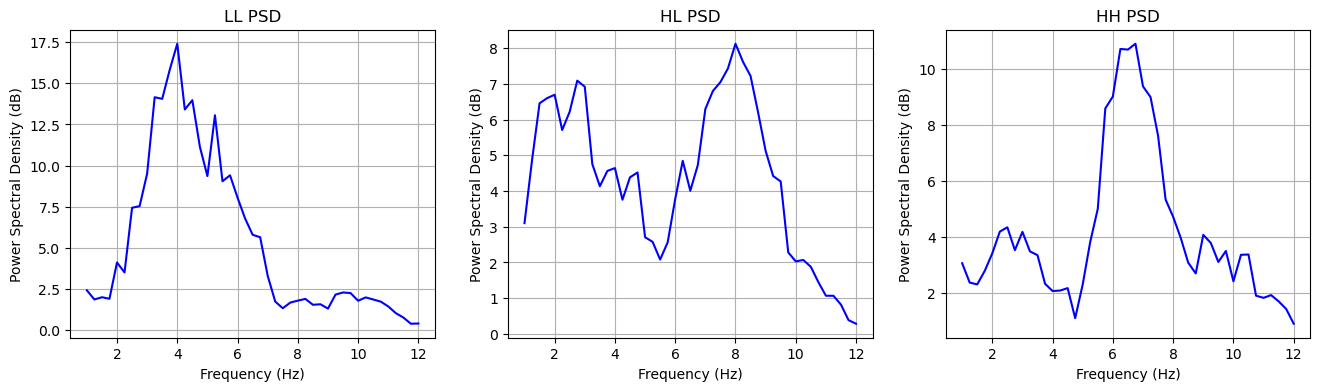

In [6]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
# Set the x-axis and y-axis labels
psd1, freqs1 = epochs['LL'][0].compute_psd(
    fmin=1, fmax=12).get_data(return_freqs=True)
axs[0].set_xlabel('Frequency (Hz)')
axs[0].set_ylabel('Power Spectral Density (dB)')
axs[0].set_title('LL PSD')
axs[0].plot(freqs1, psd1.reshape(-1), color='blue')
axs[0].grid()

psd1, freqs1 = epochs['HL'][1].compute_psd(
    fmin=1, fmax=12).get_data(return_freqs=True)
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Power Spectral Density (dB)')
axs[1].set_title('HL PSD')
axs[1].plot(freqs1, psd1.reshape(-1), color='blue')
axs[1].grid()


psd1, freqs1 = epochs['HH'][0].compute_psd(
    fmin=1, fmax=12).get_data(return_freqs=True)
axs[2].set_xlabel('Frequency (Hz)')
axs[2].set_ylabel('Power Spectral Density (dB)')
axs[2].set_title('HH PSD')
axs[2].plot(freqs1, psd1.reshape(-1), color='blue')
axs[2].grid()

plt.show()


## critical point

read LTW with HF

In [1]:
#Save location of LWH

# import pickle
# import mne
# epochs = mne.read_epochs("../fif/all2L_epo.fif")
# lEps = epochs["LL"]
# psd, freqs = lEps.compute_psd(fmin=1, fmax=12).get_data(return_freqs=True)

# l = []
# for i in range(len(psd)):
#     if critical_point(psd[i], freqs) >= 6:
#         # lEps[i].plot()
#         l.append(i)

# op = open("./list.pkl", "bw")
# pickle.dump(l, op)
# op.close()


Reading d:\OneDrive - 筑波大学\lab\codes\2labpc\handler\tool\..\fif\all2L_epo.fif ...
Isotrak not found
    Found the data of interest:
        t =       0.00 ...    3992.19 ms
        0 CTF compensation matrices available
Not setting metadata
832010 matching events found
No baseline correction applied
0 projection items activated


In [4]:
import pickle
import mne

op = open("./list.pkl", "br")
l = pickle.load(op)
op.close()

epochs = mne.read_epochs("../fif/all2L_epo.fif")


Reading d:\OneDrive - 筑波大学\lab\codes\2labpc\handler\tool\..\fif\all2L_epo.fif ...
Isotrak not found
    Found the data of interest:
        t =       0.00 ...    3992.19 ms
        0 CTF compensation matrices available
Not setting metadata
832010 matching events found
No baseline correction applied
0 projection items activated


In [5]:
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np


def stft_bin(eegepoch):
    samplingFreq = 128
    stft_nperseg = 256
    high_pass = 1
    low_pass = 12

    freqs, segment_times, Zxx = signal.stft(
        eegepoch, fs=samplingFreq, nperseg=stft_nperseg)

    def filtering(Zxx, freqs, lowerFreq, upperFreq):
        zipped = list(filter(lambda x: lowerFreq <=
                             x[1] and x[1] < upperFreq, zip(Zxx, freqs)))
        return np.array([e[0] for e in zipped]), np.array([e[1] for e in zipped])

    Zxx_filtered, f = filtering(Zxx, freqs, high_pass, low_pass)
    Zxx_binned = np.abs(Zxx_filtered)

    return Zxx_binned


segment_times = range(5)
f = np.arange(1.0, 12.0, 0.5)


HTW R&P

    Using multitaper spectrum estimation with 7 DPSS windows


C:\Users\ImpWa\AppData\Local\Temp\ipykernel_14468\2322455312.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


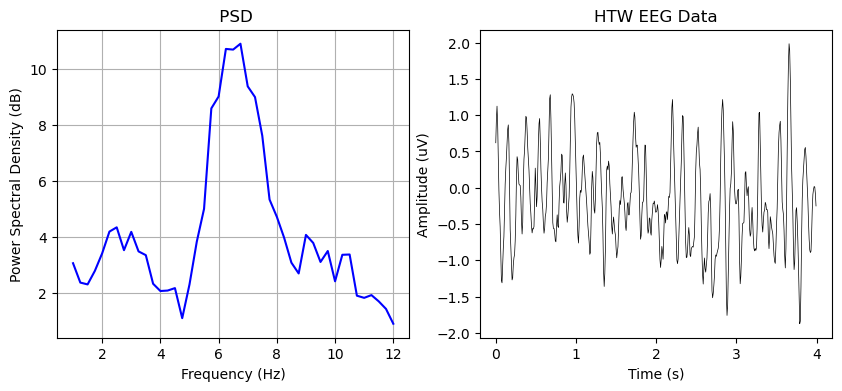

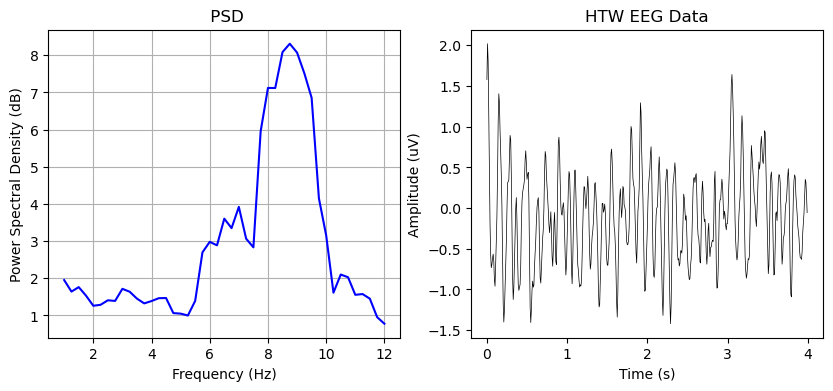

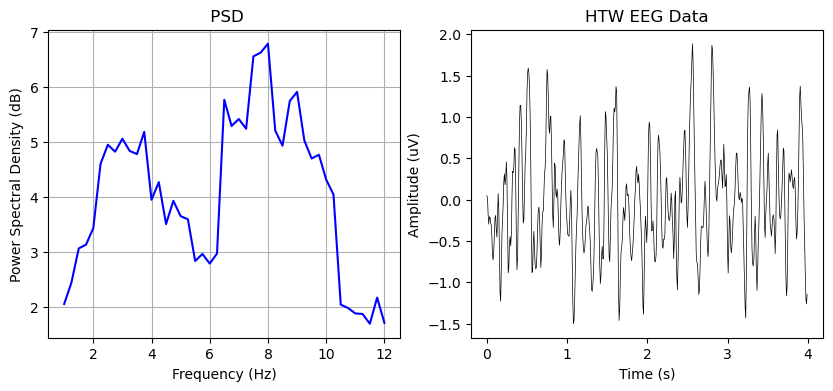

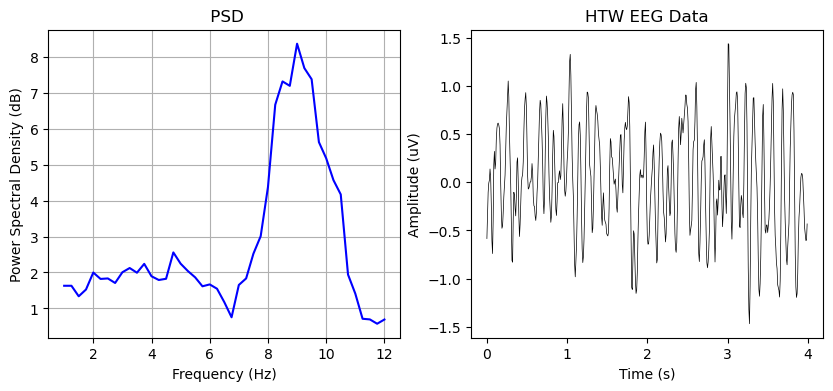

In [25]:
import matplotlib.pyplot as plt
for i in range(4):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
    # Set the x-axis and y-axis labels
    data = epochs['HH'][i]
    psd1, freqs1 = data.compute_psd(
        fmin=1, fmax=12).get_data(return_freqs=True)
    axs[0].set_xlabel('Frequency (Hz)')
    axs[0].set_ylabel('Power Spectral Density (dB)')
    axs[0].set_title(' PSD')
    axs[0].plot(freqs1, psd1.reshape(-1), color='blue')
    axs[0].grid()

    data = data.get_data().reshape(-1)
    # data = epochs["LL"].get_data()[l[0]].reshape(-1)

    axs[1].plot((np.arange(512) / 128), data, linewidth=0.5, color='black')
    axs[1].set_xlabel('Time (s)')
    axs[1].set_ylabel('Amplitude (uV)')
    axs[1].set_title('HTW EEG Data')

    fig.show()


LTW R&P

    Using multitaper spectrum estimation with 7 DPSS windows


C:\Users\ImpWa\AppData\Local\Temp\ipykernel_14468\2206753783.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


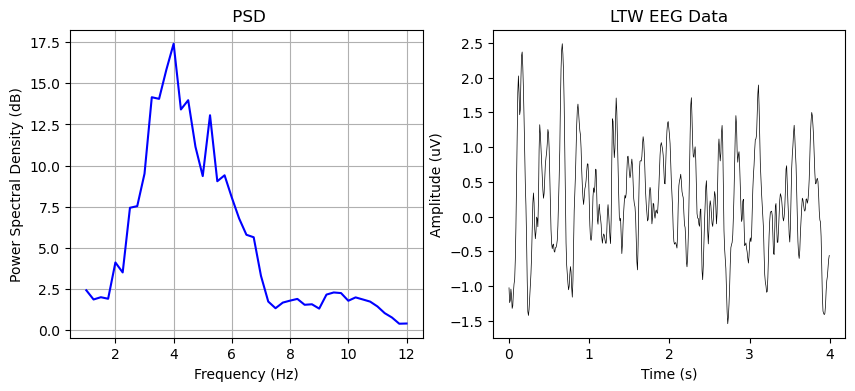

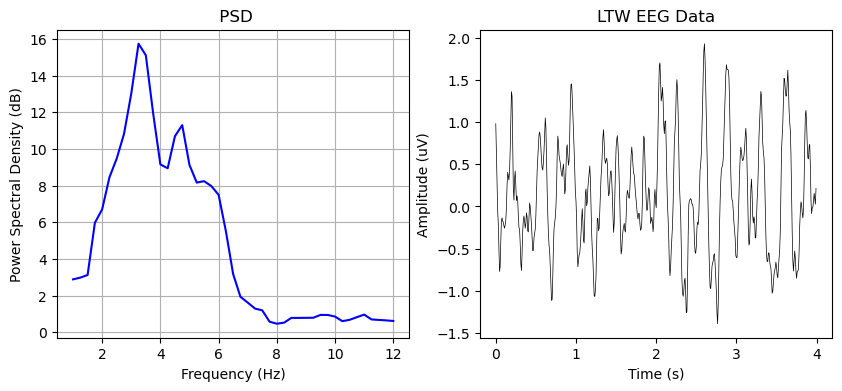

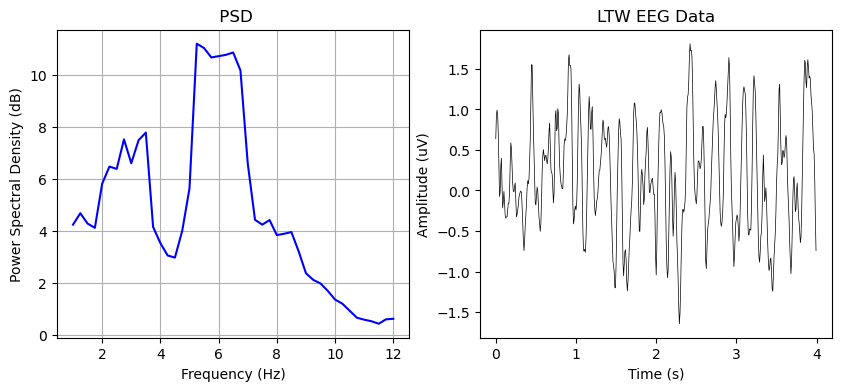

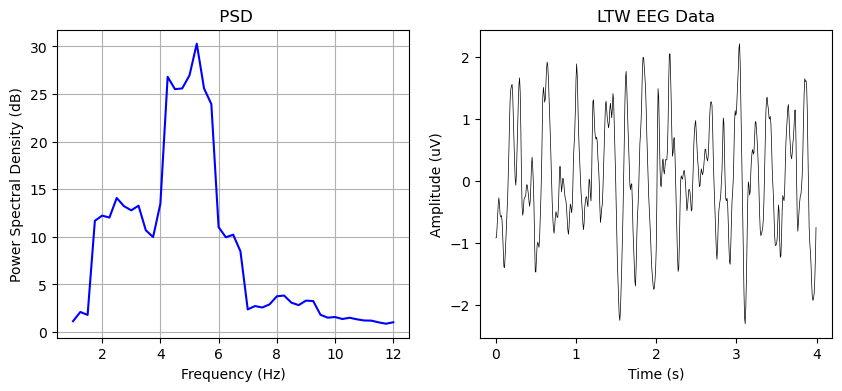

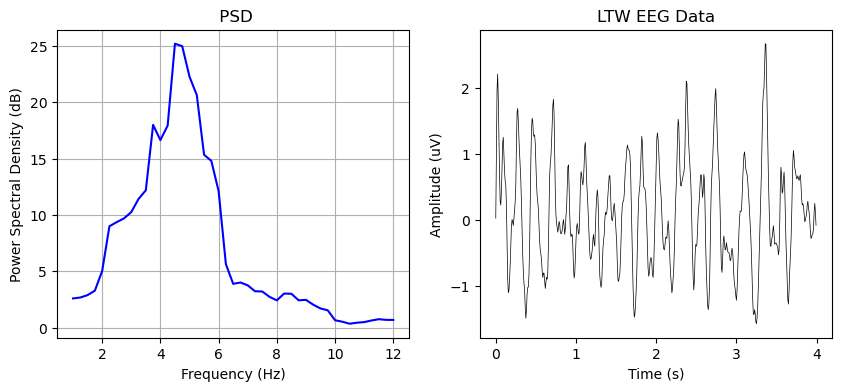

In [23]:
import matplotlib.pyplot as plt
for i in range(5):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
    # Set the x-axis and y-axis labels
    data = epochs['LL'][i]
    psd1, freqs1 = data.compute_psd(
        fmin=1, fmax=12).get_data(return_freqs=True)
    axs[0].set_xlabel('Frequency (Hz)')
    axs[0].set_ylabel('Power Spectral Density (dB)')
    axs[0].set_title(' PSD')
    axs[0].plot(freqs1, psd1.reshape(-1), color='blue')
    axs[0].grid()

    data = data.get_data().reshape(-1)
    # data = epochs["LL"].get_data()[l[0]].reshape(-1)

    axs[1].plot((np.arange(512) / 128), data, linewidth=0.5, color='black')
    axs[1].set_xlabel('Time (s)')
    axs[1].set_ylabel('Amplitude (uV)')
    axs[1].set_title('LTW EEG Data')

    fig.show()


LWH R&P

    Using multitaper spectrum estimation with 7 DPSS windows


C:\Users\ImpWa\AppData\Local\Temp\ipykernel_14468\1103418951.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


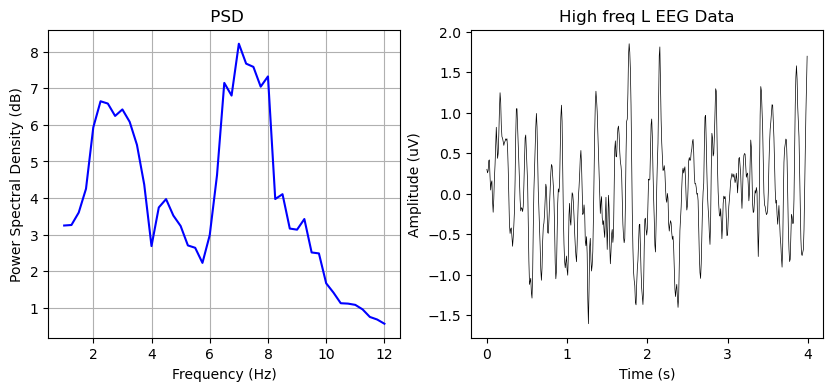

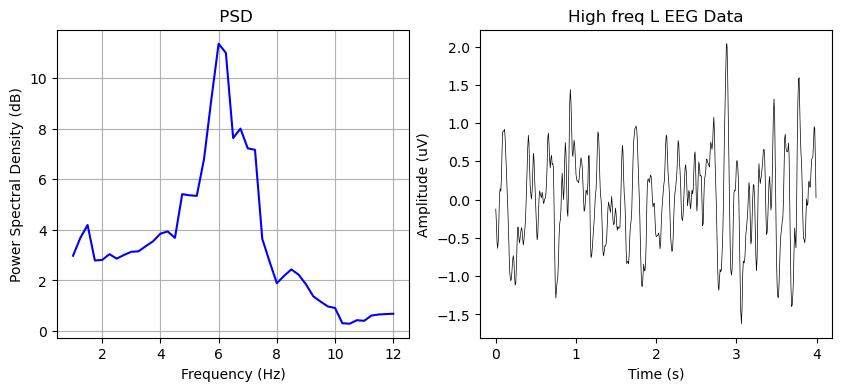

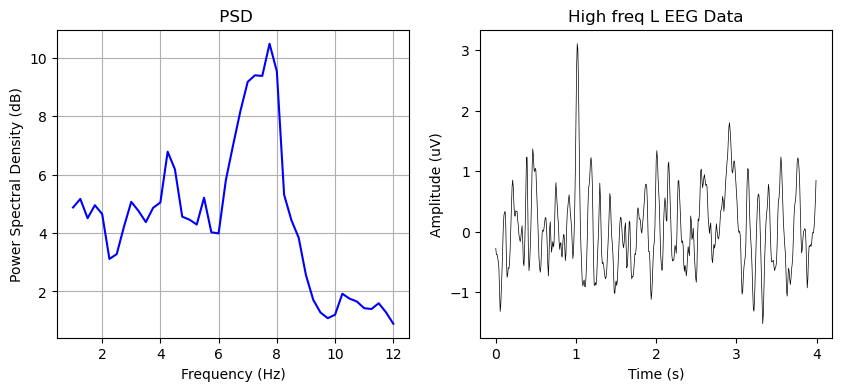

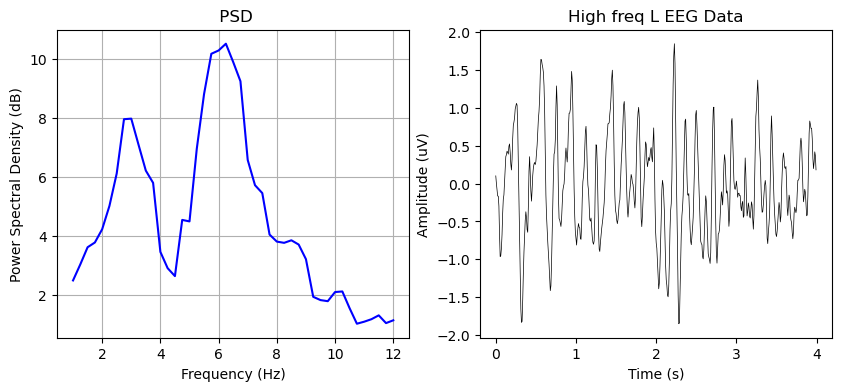

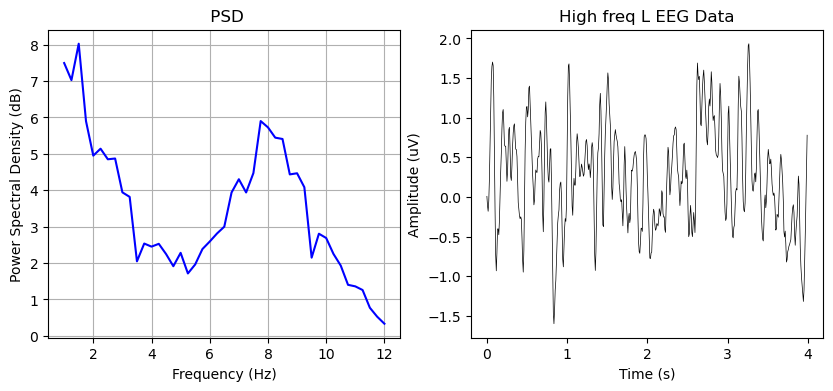

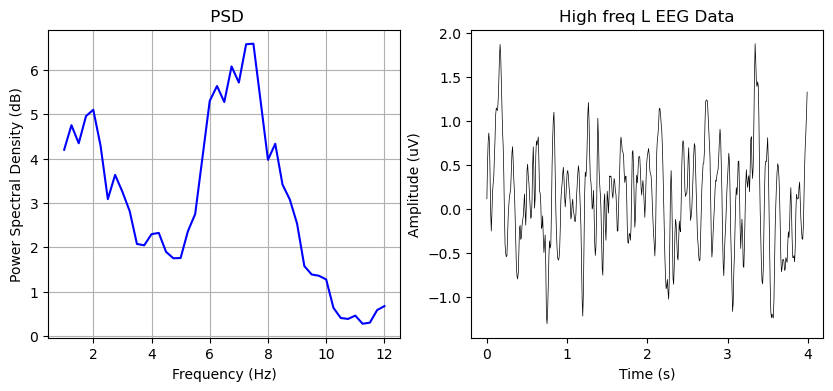

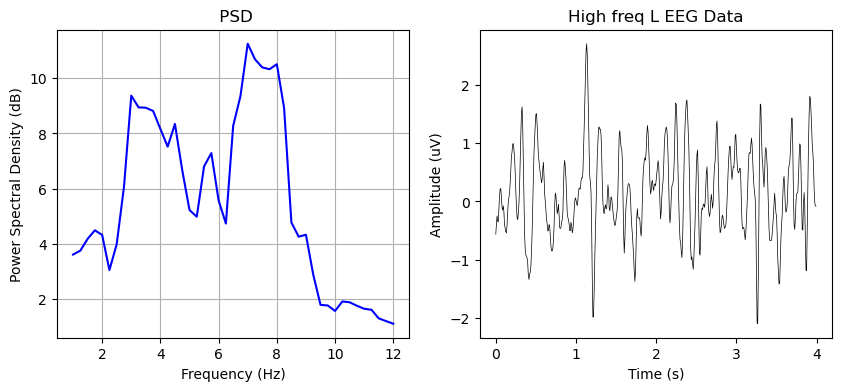

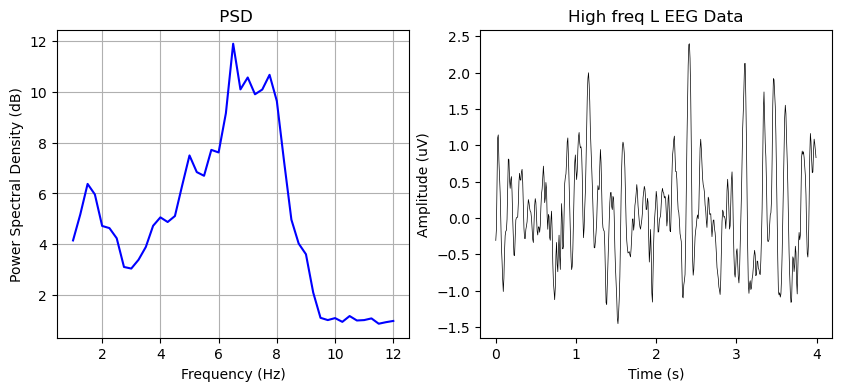

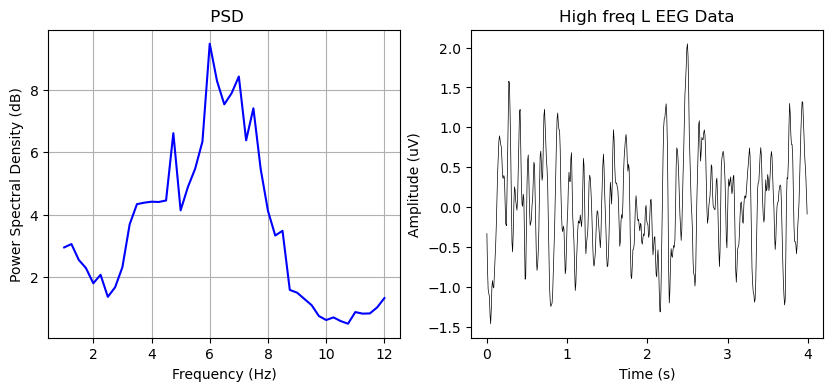

In [22]:
import matplotlib.pyplot as plt
for i in range(9):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
    # Set the x-axis and y-axis labels
    data = epochs['LL'][l[i]]
    psd1, freqs1 = data.compute_psd(
        fmin=1, fmax=12).get_data(return_freqs=True)
    axs[0].set_xlabel('Frequency (Hz)')
    axs[0].set_ylabel('Power Spectral Density (dB)')
    axs[0].set_title(' PSD')
    axs[0].plot(freqs1, psd1.reshape(-1), color='blue')
    axs[0].grid()

    data = data.get_data().reshape(-1)
    # data = epochs["LL"].get_data()[l[0]].reshape(-1)

    axs[1].plot((np.arange(512) / 128), data, linewidth=0.5, color='black')
    axs[1].set_xlabel('Time (s)')
    axs[1].set_ylabel('Amplitude (uV)')
    axs[1].set_title('High freq L EEG Data')

    fig.show()

LWH RPS

    Using multitaper spectrum estimation with 7 DPSS windows


C:\Users\ImpWa\AppData\Local\Temp\ipykernel_14468\3652536272.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


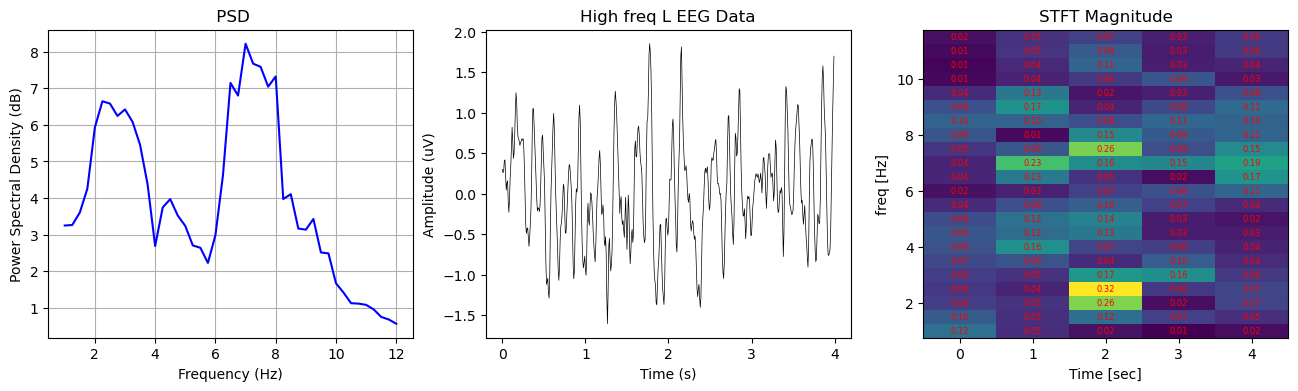

In [19]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
# Set the x-axis and y-axis labels
psd1, freqs1 = epochs['LL'][l[0]].compute_psd(
    fmin=1, fmax=12).get_data(return_freqs=True)
axs[0].set_xlabel('Frequency (Hz)')
axs[0].set_ylabel('Power Spectral Density (dB)')
axs[0].set_title(' PSD')
axs[0].plot(freqs1, psd1.reshape(-1), color='blue')
axs[0].grid()

data = epochs["LL"].get_data()[l[0]].reshape(-1)

axs[1].plot((np.arange(512) / 128), data, linewidth=0.5, color='black')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Amplitude (uV)')
axs[1].set_title('High freq L EEG Data')

stft = stft_bin(data)
axs[2].pcolormesh(segment_times, f, stft)  # shading='gouraud')
axs[2].set_title('STFT Magnitude')
axs[2].set_ylabel('freq [Hz]')
axs[2].set_xlabel('Time [sec]')

x, y = segment_times, f
for i in range(len(y)):
    for j in range(len(x)):
        axs[2].annotate(f'{stft[i, j]:.2f}', xy=(
            x[j], y[i]), ha='center', va='center', fontsize=6, color="r")

fig.show()

calculate Cr.P

In [4]:
import numpy as np

def critical_point(psd, f):
    psd = psd.flatten()
    f = f.flatten()
    max_ind = 1
    max_cp = 0
    for cp in range(len(f)):
        l = np.sum(psd[:cp])
        h = np.sum(psd[cp:])
        h_ind = abs((h-l)/(h+l))

        if h_ind < max_ind:
            max_ind = h_ind
            max_cp = cp
            # print("CP:{} | L:{} | H:{}".format(cp,l,h))
            # print("Percentage: L = {}% | H = {}%".format(100*l/(l+h), 100*h/(l+h)))
    return f[max_cp]

In [66]:
psd, freqs = epochs["HH"].compute_psd(
    fmin=1, fmax=12).get_data(return_freqs=True)
psd = psd.reshape(-1,45)
ct = []
for i in psd:
    ct.append(critical_point(i, freqs))

d = {x:ct.count(x) for x in ct}

print(d)

    Using multitaper spectrum estimation with 7 DPSS windows
{6.75: 1185, 8.25: 264, 7.0: 1266, 8.5: 119, 7.5: 1050, 8.0: 480, 6.0: 372, 7.25: 1195, 6.5: 971, 7.75: 762, 6.25: 739, 5.75: 180, 5.5: 65, 5.0: 9, 8.75: 34, 3.0: 1, 5.25: 27, 4.75: 4, 4.25: 3, 1.5: 2, 3.25: 1, 2.5: 1, 9.0: 12, 9.5: 1, 9.25: 2, 4.5: 1, 3.75: 1}


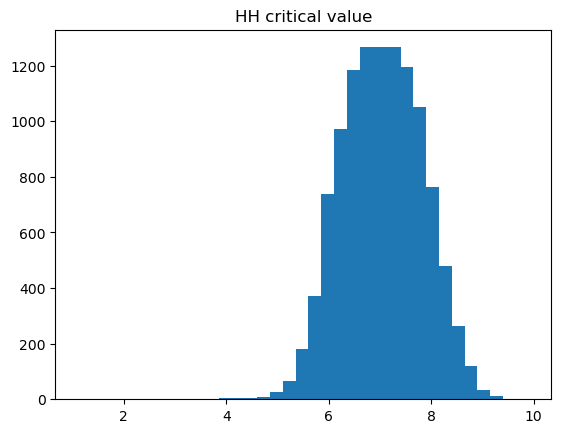

In [69]:
import matplotlib.pyplot as plt

plt.bar(*zip(*d.items()))
plt.title('HH critical value')

plt.show()


In [70]:
import matplotlib.pyplot as plt
def cp4all(l):
    psd, freqs = epochs[l].compute_psd(
        fmin=1, fmax=12).get_data(return_freqs=True)
    psd = psd.reshape(-1, 45)
    ct = []
    for i in psd:
        ct.append(critical_point(i, freqs))

    d = {x: ct.count(x) for x in ct}

    # print(d)

    plt.bar(*zip(*d.items()))
    plt.title('{} critical value'.format(l))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('epoch count')
    plt.show()


    Using multitaper spectrum estimation with 7 DPSS windows


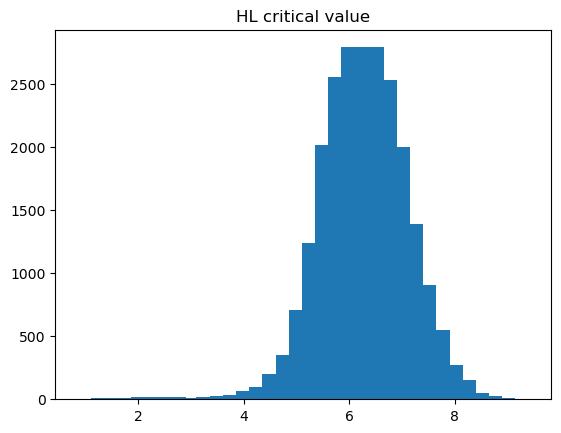

    Using multitaper spectrum estimation with 7 DPSS windows


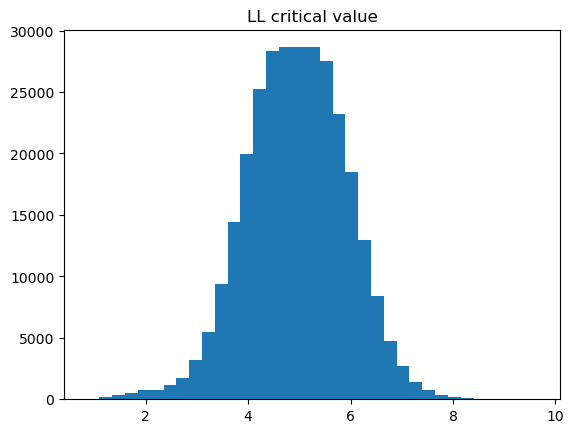

In [71]:
cp4all("HL")
cp4all("LL")


    Using multitaper spectrum estimation with 7 DPSS windows


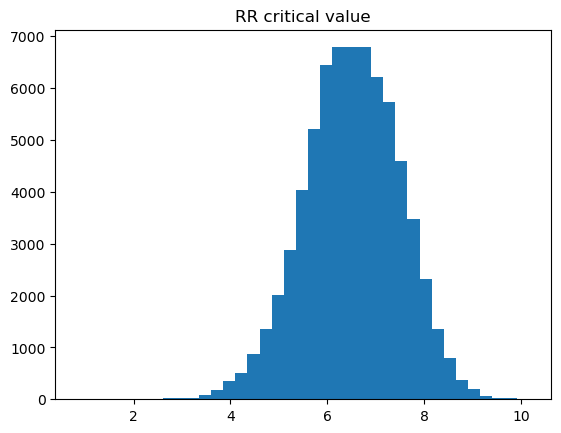

In [72]:
cp4all("RR")


    Using multitaper spectrum estimation with 7 DPSS windows


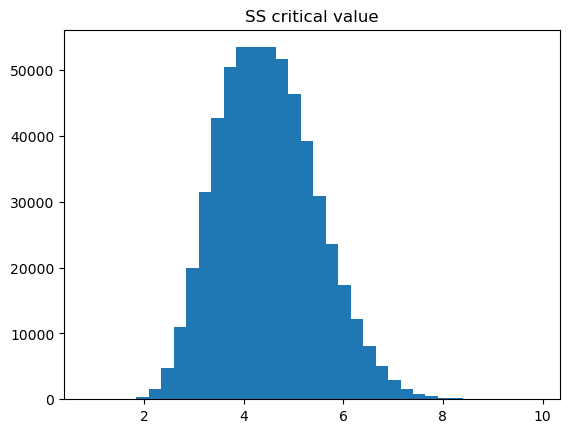

In [73]:
cp4all("SS")


In [48]:
import numpy as np

def critical_point(psd, f):
    psd = psd.flatten()
    f = f.flatten()
    # cp = int((p-1)/tick)
    max_ind = 1
    max_cp = 0
    for cp in range(len(f)):
        l = np.sum(psd[:cp])
        h = np.sum(psd[cp:])
        h_ind = abs((h-l)/(h+l))

        if h_ind < max_ind:
            max_ind = h_ind
            # print(max_ind)
            max_cp = cp
            # print("CP:{} | L:{} | H:{}".format(cp,l,h))
            # print("Percentage: L = {}% | H = {}%".format(100*l/(l+h), 100*h/(l+h)))
    return f[max_cp]

def cp_l(x):
    psd, freqs = epochs[x].compute_psd(
        fmin=1, fmax=12).get_data(return_freqs=True)

    total_power = np.sum(psd, axis=-1, keepdims=True)

    normalized_psd = (psd / total_power)
    m1 = np.mean(normalized_psd, axis=0)[0]
    print("\n{} critical point:{}".format(x,critical_point(m1, freqs)))



In [53]:
cp_l('HH')
cp_l('LL')
cp_l('HL')


    Using multitaper spectrum estimation with 7 DPSS windows

HH critical point:7.0
    Using multitaper spectrum estimation with 7 DPSS windows

LL critical point:5.0
    Using multitaper spectrum estimation with 7 DPSS windows

HL critical point:6.25


    Using multitaper spectrum estimation with 7 DPSS windows


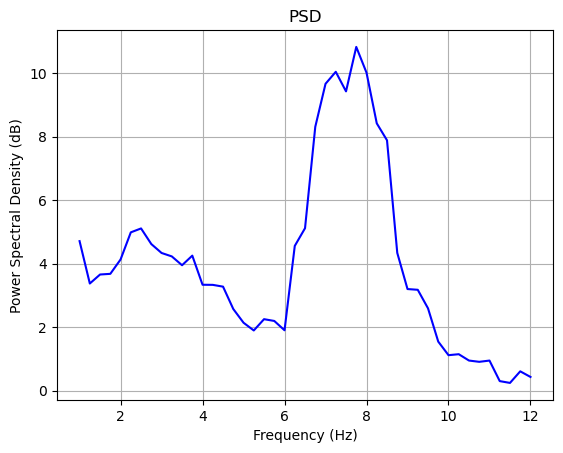

In [24]:
psd1, freqs1 = eps['HL'][0].compute_psd(
    fmin=1, fmax=12).get_data(return_freqs=True)
fig, ax = plt.subplots()
# Set the x-axis and y-axis labels
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Power Spectral Density (dB)')
ax.set_title('PSD')
ax.plot(freqs1, psd1.reshape(-1), color='blue', label="H=>H")
plt.grid()
plt.show()


    Using multitaper spectrum estimation with 7 DPSS windows


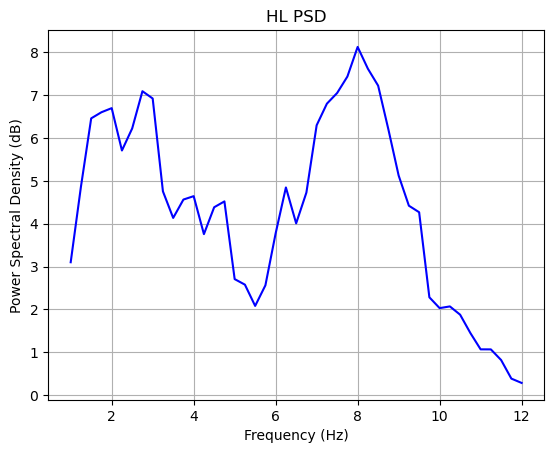

In [6]:
psd1, freqs1 = eps['HL'][1].compute_psd(
    fmin=1, fmax=12).get_data(return_freqs=True)
fig, ax = plt.subplots()
# Set the x-axis and y-axis labels
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Power Spectral Density (dB)')
ax.set_title('HL PSD')
ax.plot(freqs1, psd1.reshape(-1), color='blue', label="H=>H")
plt.grid()
plt.show()


    Using multitaper spectrum estimation with 7 DPSS windows


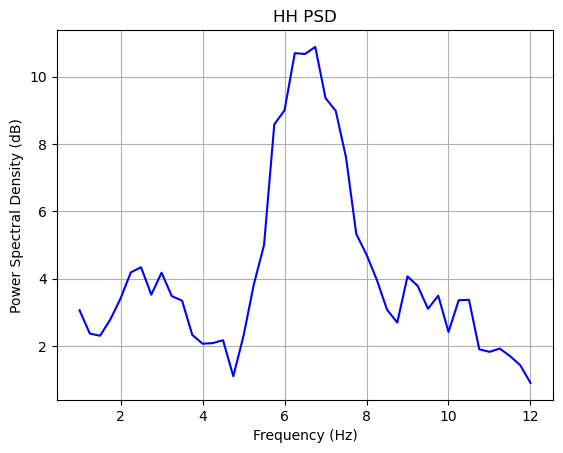

In [7]:
psd1, freqs1 = eps['HH'][0].compute_psd(fmin=1, fmax=12).get_data( return_freqs=True)
fig, ax = plt.subplots()
# Set the x-axis and y-axis labels
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Power Spectral Density (dB)')
ax.set_title('HH PSD')
ax.plot(freqs1, psd1.reshape(-1), color='blue', label="H=>H")
plt.grid()
plt.show()


In [ ]:
def psd_(epochs, log=False, twolabels=True, ci=True):
  if twolabels:
    if epochs['HH']:
        epochs1 = epochs['HH']
        epochs2 = epochs['HL']
        epochs3 = epochs['LL']
        # epochs4 = epochs['LH']
        fmin, fmax = 2, 14
        psd1, freqs1 = epochs1.compute_psd(fmin=fmin, fmax=fmax).get_data(
            return_freqs=True)  # , fmin=fmin, fmax=fmax, n_jobs=1)
        psd2, freqs2 = epochs2.compute_psd(fmin=fmin, fmax=fmax).get_data(
            return_freqs=True)  # , fmin=fmin, fmax=fmax, n_jobs=1)
        psd3, freqs3 = epochs3.compute_psd(fmin=fmin, fmax=fmax).get_data(
            return_freqs=True)

        fig, ax = plt.subplots(figsize=(16, 9))
        # Set the x-axis and y-axis labels
        ax.set_xlabel('Frequency (Hz)')
        ax.set_ylabel('Power Spectral Density (dB)')
        ax.set_title('PSD(128Hz)')

        if log:
          psd1 = np.log(psd1)
          psd2 = np.log(psd2)
          psd3 = np.log(psd3)
          ax.set_ylabel('Log_Power Spectral Density (dB)')

        m1 = np.mean(psd1, axis=0)[0]
        m2 = np.mean(psd2, axis=0)[0]
        m3 = np.mean(psd3, axis=0)[0]

        # Plot the PSD of the first Epochs object
        ax.plot(freqs1, m1, color='blue', label="H=>H: "+str(len(epochs1)))
        ax.plot(freqs2, m2, color='red', label="H=>L: "+str(len(epochs2)))
        ax.plot(freqs3, m3, color='green', label="L=>L: "+str(len(epochs3)))
        # ax.plot(freqs4, np.mean(psd4, axis=0)[0], color='orange', label="L=>H: "+str(len(epochs4)))

        if ci:
          sd1 = np.std(psd1, axis=0)[0]
          sd2 = np.std(psd2, axis=0)[0]
          sd3 = np.std(psd3, axis=0)[0]
          ax.fill_between(freqs1, m1-sd1, m1+sd1, alpha=.2)
          ax.fill_between(freqs2, m2-sd2, m2+sd2, alpha=.2)
          ax.fill_between(freqs3, m3-sd3, m3+sd3, alpha=.2)

        ax.legend()
        ax.set_xticks(range(0, 15, 1))
        # Show the plot
        plt.grid()
        plt.show()
  else:
    epochs1 = epochs['H']
    epochs2 = epochs['L']
    psd1, freqs1 = epochs1.compute_psd(fmax=20).get_data(
        return_freqs=True)  # , fmin=fmin, fmax=fmax, n_jobs=1)
    psd2, freqs2 = epochs2.compute_psd(fmax=20).get_data(
        return_freqs=True)  # , fmin=fmin, fmax=fmax, n_jobs=1)

    fig, ax = plt.subplots(figsize=(8, 4))
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Power Spectral Density (dB)')

    # Set the title of the plot
    ax.set_title('Power Spectral Density')

    if log:
        psd1 = np.log(psd1)
        psd2 = np.log(psd2)
        ax.set_ylabel('Log_Power Spectral Density (dB)')

    m1 = np.mean(psd1, axis=0)[0]
    m2 = np.mean(psd2, axis=0)[0]

    # Plot the PSD of the first Epochs object
    ax.plot(freqs1, np.mean(psd1, axis=0)[
            0], color='blue', label="HTW: "+str(len(epochs1)))
    ax.plot(freqs2, np.mean(psd2, axis=0)[
            0], color='green', label="LTW: "+str(len(epochs2)))
    if ci:
      sd1 = np.std(psd1, axis=0)[0]
      sd2 = np.std(psd2, axis=0)[0]
      # Set the x-axis and y-axis labels
      ax.fill_between(freqs1, m1-sd1, m1+sd1, alpha=.2)
      ax.fill_between(freqs2, m2-sd2, m2+sd2, alpha=.2)
    # Add a legend to the plot
    ax.legend()
    ax.set_xticks(range(0, 15, 1))
    # Show the plot
    plt.grid()
    plt.show()
    # Calculate the PSD of the second Epochs object
    # psd2, freqs2 = mne.time_frequency.psd_multitaper(epochs2)#, fmin=fmin, fmax=fmax, n_jobs=1)
